In [5]:
import pandas as pd

In [6]:
df= pd.read_csv('mallCustomers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.columns = [col.strip().replace(' ', '_') for col in df.columns]
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
CustomerID                0
Genre                     0
Age                       0
Annual_Income_(k$)        0
Spending_Score_(1-100)    0
dtype: int64


In [3]:
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]
print(data.describe())

       Annual Income (k$)  Spending Score (1-100)
count          200.000000              200.000000
mean            60.560000               50.200000
std             26.264721               25.823522
min             15.000000                1.000000
25%             41.500000               34.750000
50%             61.500000               50.000000
75%             78.000000               73.000000
max            137.000000               99.000000


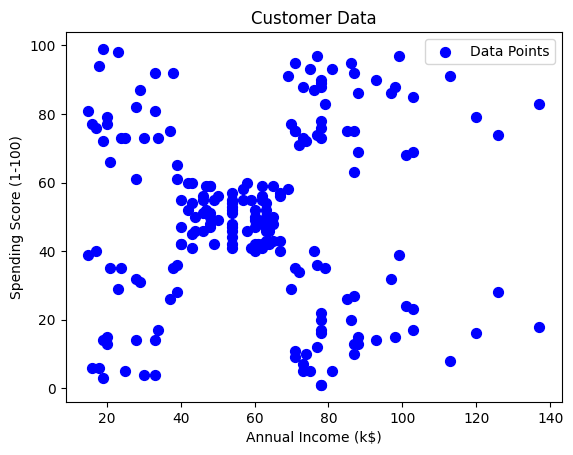

In [4]:
import matplotlib.pyplot as plt

plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], s=50, c='blue', label='Data Points')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Data')
plt.legend()
plt.show()

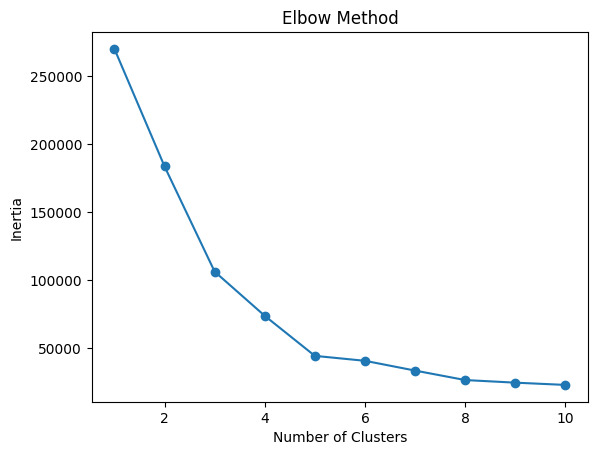

In [6]:
from sklearn.cluster import KMeans

# Compute the sum of squared distances (inertia) for different numbers of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [7]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data)

df['Cluster'] = clusters

print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


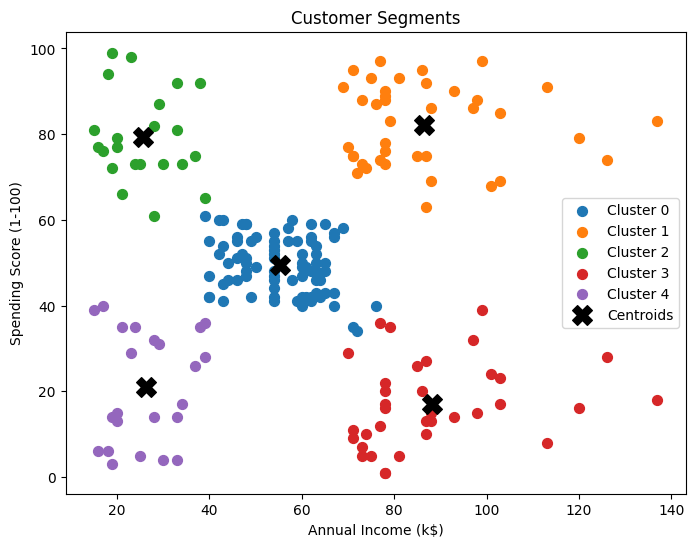

In [8]:
plt.figure(figsize=(8, 6))
for cluster in range(5):
    clustered_data = data[df['Cluster'] == cluster]
    plt.scatter(
        clustered_data['Annual Income (k$)'],
        clustered_data['Spending Score (1-100)'],
        label=f'Cluster {cluster}',
        s=50
    )

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.legend()
plt.show()

In [9]:
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043
